# Tensorflow CNN - Emotion Recognition
## raoyonghui0630@gmail.com

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
import matplotlib
import os 
%matplotlib inline

In [6]:
# Load data
# The data is downloaded from
# https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data
import pandas as pd
dir_name = 'EmotionData'  
file_path = dir_name + os.sep + "fer2013.csv"
print "Read emotion data from", file_path

data = pd.read_csv(file_path, dtype='a')  
label = np.array(data['emotion'])  
img_data = np.array(data['pixels'])  
N_sample = label.size  

# print label.size  
Face_data = np.zeros((N_sample, 48 * 48))  
Face_label = np.zeros((N_sample, 7), dtype=int)  
temp = np.zeros((7), dtype= int)  
for i in range(N_sample):  
    x = img_data[i]  
    x = np.fromstring(x, dtype=float, sep=' ')  
    x_max = x.max()  
    x = x / (x_max + 0.0001)  
  
    Face_data[i] = x  
    Face_label[i, int(label[i])] = 1  
  
train_num = 30000  
test_num = 5000  
train_x = Face_data[0:train_num, :]  
train_y = Face_label[0:train_num, :]  
test_x = Face_data[train_num: train_num + test_num, :]  
test_y = Face_label[train_num: train_num + test_num, :]  


Read emotion data from EmotionData/fer2013.csv


In [7]:
x = tf.placeholder(tf.float32,(None,2304))
y = tf.placeholder(tf.int32,(None,7))

keep_prob = tf.placeholder(tf.float32)

batch_size = 10
n_batch = len(train_x) // batch_size

test_n_batch = len(test_x) // batch_size

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev = 0.1)
    return tf.Variable(initial)
    
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x,W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1],padding="SAME")

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")

def max_pool_4x4(x):
    return tf.nn.max_pool(x, ksize=[1,4,4,1], strides=[1,4,4,1], padding="SAME")

def max_pool_8x8(x):
    return tf.nn.max_pool(x, ksize=[1,8,8,1], strides=[1,8,8,1], padding="SAME")

x_image = tf.reshape(x,[-1, 48, 48,1])

W_conv1 = weight_variable([3,3,1,32])
b_conv1 = bias_variable([32])

h_conv1= tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([3,3,32,64])
b_conv2 = bias_variable([64])

h_conv2  = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_conv3 = weight_variable([3,3,64,64])
b_conv3 = bias_variable([64])

h_conv3  = tf.nn.relu(conv2d(h_pool2, W_conv3) + b_conv3)
h_pool3 = max_pool_2x2(h_conv3)

# the first full connection layer, with relu activation
W_fc1 = weight_variable([64*6*6, 100])
b_fc1 = bias_variable([100])

h_pool3_flat = tf.reshape(h_pool3, [-1, 64*6*6])
h_fc1 = tf.nn.relu(tf.matmul(h_pool3_flat, W_fc1) + b_fc1)


# the second full connection layer, with softmax activation
W_fc2 = weight_variable([100, 7])
b_fc2 = bias_variable([7])

prediction = tf.nn.softmax(tf.matmul(h_fc1,W_fc2) + b_fc2)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=prediction))

train_step = tf.train.AdamOptimizer(0.0001).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(prediction,1), tf.argmax(y,1)) 

accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(20):
        for batch in range(n_batch):
            batch_xs = train_x[batch_size * batch: batch_size * batch + batch_size]
            batch_ys = train_y[batch_size * batch: batch_size * batch + batch_size]
            sess.run(train_step,feed_dict ={x:batch_xs, y:batch_ys, keep_prob:1.0})
        acc_array = []
        for batch in range(test_n_batch):
            batch_xs = test_x[batch_size * batch: batch_size * batch + batch_size]
            batch_ys = test_y[batch_size * batch: batch_size * batch + batch_size]
            acc = sess.run(accuracy,feed_dict ={x:batch_xs, y:batch_ys, keep_prob:1.0})
            acc_array.append(acc)
        print "Iter ", str(epoch), ", Testing Accuracy: ", str(sum(acc_array) / float(len(acc_array)))

                

Iter  0 , Testing Accuracy:  0.32380000636
Iter  1 , Testing Accuracy:  0.359800006717
Iter  2 , Testing Accuracy:  0.378800006941
Iter  3 , Testing Accuracy:  0.387000007436
Iter  4 , Testing Accuracy:  0.394400006473
Iter  5 , Testing Accuracy:  0.398800005943
Iter  6 , Testing Accuracy:  0.405600006372
Iter  7 , Testing Accuracy:  0.410800006211
Iter  8 , Testing Accuracy:  0.420600006491
Iter  9 , Testing Accuracy:  0.421800006509
Iter  10 , Testing Accuracy:  0.428200007066
Iter  11 , Testing Accuracy:  0.427400006935
Iter  12 , Testing Accuracy:  0.42800000678
Iter  13 , Testing Accuracy:  0.428600007027
Iter  14 , Testing Accuracy:  0.4322000072
Iter  15 , Testing Accuracy:  0.430000006974
Iter  16 , Testing Accuracy:  0.432000007123
Iter  17 , Testing Accuracy:  0.432600006595
Iter  18 , Testing Accuracy:  0.432400006577
Iter  19 , Testing Accuracy:  0.430200007096


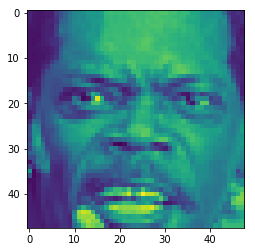

In [8]:
# Show one image
array = train_x[10].reshape(48,48)
plt.imshow(array)